# Heart Failure Data

In [1]:
!pip install mlxtend

In [2]:
!pip install statsmodels

### Data Exploration

In [3]:
import pandas as pd
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### Check missing values

In [6]:
print('Checking missing data : \n{}'.format(df.isnull().any()), '\n')
print('Counting missing data : \n{}'.format(df.isna().sum()), '\n')
print('Finished')

Checking missing data : 
age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool 

Counting missing data : 
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64 

Finished


In [7]:
# check duplicate data
duplicatedData = df[df.duplicated()]
print(duplicatedData)

Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []


## Information Field

- Sex (Gender of patient) -> Male = 1, Female =0
- Diabetes -> 0 = No, 1 = Yes
- Anaemia -> 0 = No, 1 = Yes
- High blood pressure -> 0 = No, 1 = Yes
- Smoking -> 0 = No, 1 = Yes
- Death -> 0 = No, 1 = Yes

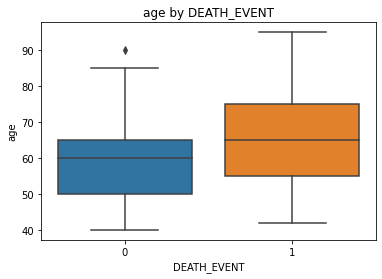

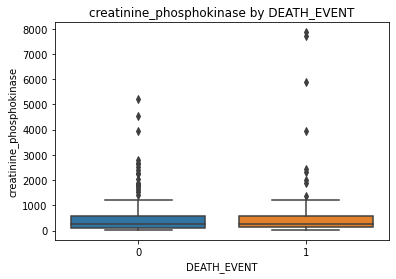

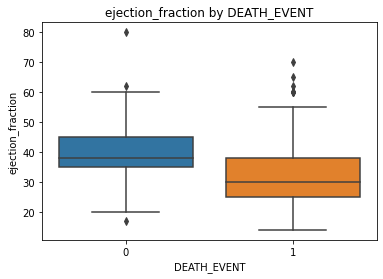

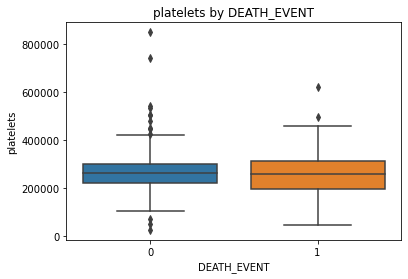

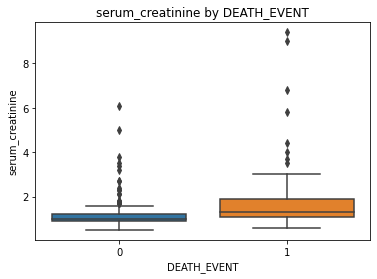

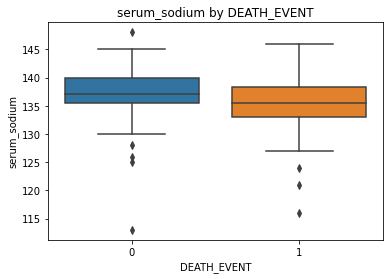

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
features = df.drop(['DEATH_EVENT', 'time', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis=1).columns
for i in features:
    sns.boxplot(x="DEATH_EVENT",y=i,data=df)
    plt.title(i+" by "+"DEATH_EVENT")
    plt.show()

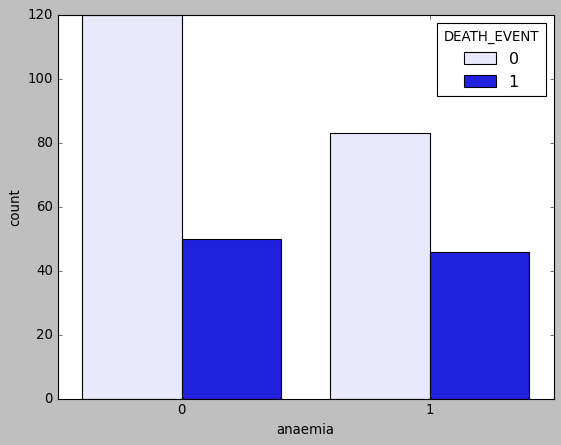

In [9]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x = 'anaemia',data=df,hue = 'DEATH_EVENT',color='blue')
plt.show()

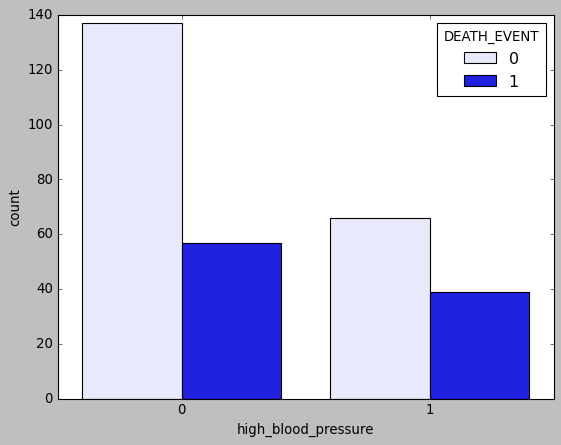

In [10]:
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x = 'high_blood_pressure',data=df,hue = 'DEATH_EVENT',color='blue')
plt.show()

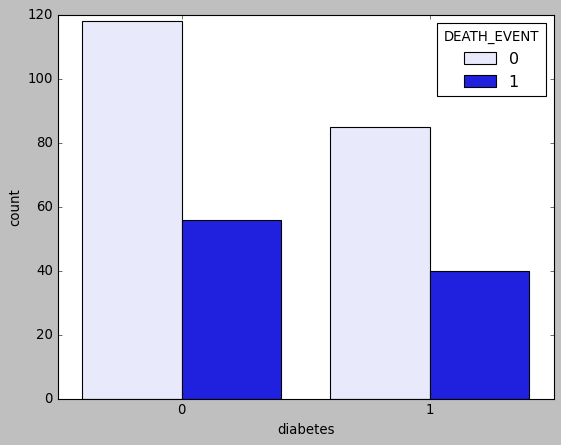

In [11]:
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x = 'diabetes',data=df,hue = 'DEATH_EVENT',color='blue')
plt.show()

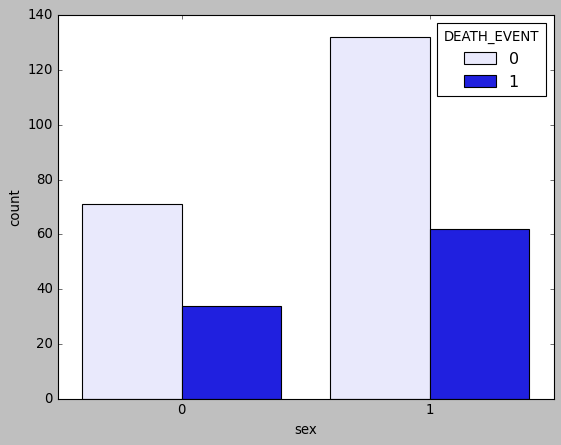

In [12]:
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x = 'sex',data=df,hue = 'DEATH_EVENT',color='blue')
plt.show()

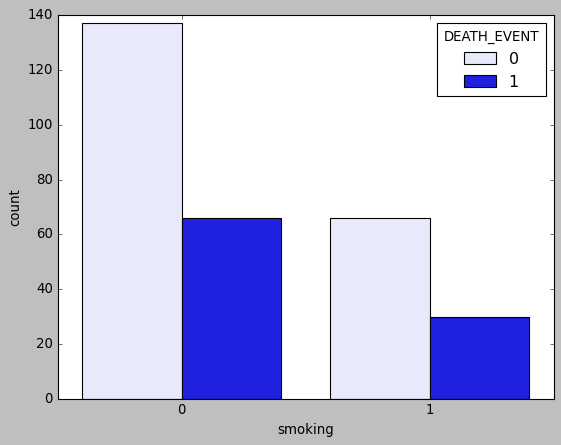

In [13]:
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x = 'smoking',data=df,hue = 'DEATH_EVENT',color='blue')
plt.show()

#### Analyzing relationships between survival and numerical variables

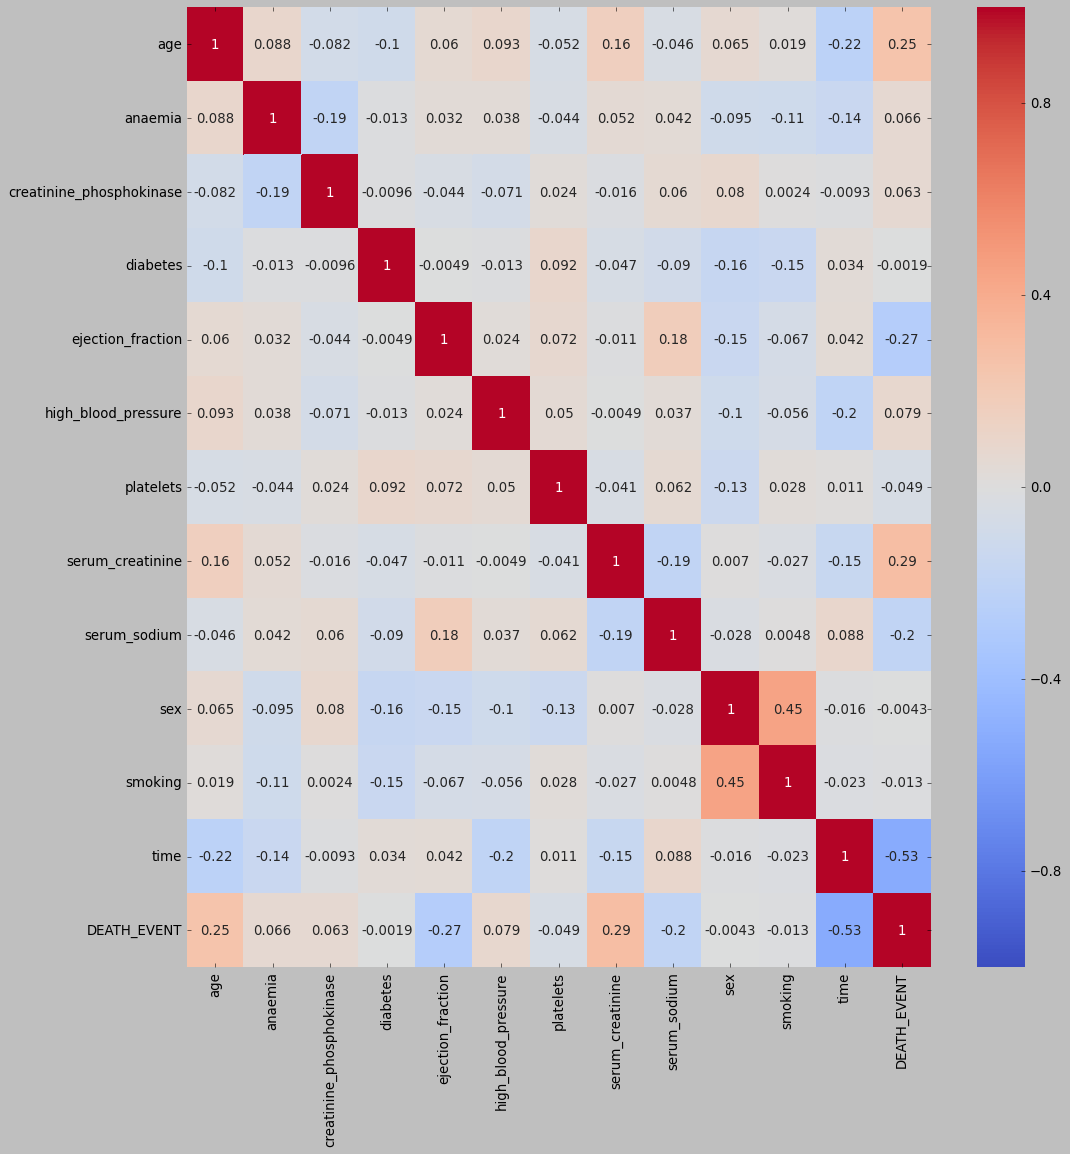

In [14]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [15]:
#feature dengan korelasi lebih besar terhadap DEATH_EVENT
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

#### Prediction Death using Logistic Regression

#### Without Normalization

In [16]:
# feature selection
features = df[['ejection_fraction', 'serum_creatinine', 'time']]
features.head()

,ejection_fraction,serum_creatinine,time
0,20,1.9,4
1,38,1.1,6
2,20,1.3,7
3,20,1.9,7
4,20,2.7,8


In [17]:
target = df['DEATH_EVENT']
target.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=2)

In [19]:
print('Number of training data (features) : {}'.format(len(x_train)))
print('Number of training data (target) : {}'.format(len(y_train)))
print('Number of test data (features) : {}'.format(len(x_test)))
print('Number of test data (target) : {}'.format(len(y_test)))

Number of training data (features) : 239
Number of training data (target) : 239
Number of test data (features) : 60
Number of test data (target) : 60


In [20]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
prediction = model.predict(x_test)
accuracy = model.score(x_test, y_test)

In [22]:
print('Prediction Result (Array) : \n{}'.format(prediction))
print('Accuracy of Logistic Regression : {}'.format(100 * accuracy), '%')

Prediction Result (Array) : 
[0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0]
Accuracy of Logistic Regression : 90.0 %


In [23]:
model.predict_proba(x_test)

array([[0.88776795, 0.11223205],
       [0.96704624, 0.03295376],
       [0.85736709, 0.14263291],
       [0.5822132 , 0.4177868 ],
       [0.67943742, 0.32056258],
       [0.22072881, 0.77927119],
       [0.69078981, 0.30921019],
       [0.72585546, 0.27414454],
       [0.97759473, 0.02240527],
       [0.70543141, 0.29456859],
       [0.27112719, 0.72887281],
       [0.96877142, 0.03122858],
       [0.06213896, 0.93786104],
       [0.9315109 , 0.0684891 ],
       [0.56605582, 0.43394418],
       [0.95337645, 0.04662355],
       [0.94038576, 0.05961424],
       [0.67143892, 0.32856108],
       [0.69947733, 0.30052267],
       [0.9301213 , 0.0698787 ],
       [0.05741378, 0.94258622],
       [0.56228656, 0.43771344],
       [0.21976445, 0.78023555],
       [0.74819873, 0.25180127],
       [0.64843867, 0.35156133],
       [0.24020151, 0.75979849],
       [0.95224233, 0.04775767],
       [0.97189115, 0.02810885],
       [0.88488467, 0.11511533],
       [0.76318997, 0.23681003],
       [0.

In [24]:
y_test

179    0
221    0
226    0
7      1
173    0
30     1
183    1
181    1
271    0
141    0
13     1
272    0
35     1
270    0
77     0
267    0
206    0
94     0
91     0
214    0
3      1
104    0
29     1
170    0
134    0
41     1
251    0
288    0
133    0
160    0
152    0
66     1
243    0
237    0
89     0
273    0
157    0
103    0
126    1
222    0
11     1
224    0
164    1
127    0
174    0
74     1
188    0
239    0
283    0
156    0
131    0
99     0
10     1
84     1
142    0
65     1
118    0
282    0
109    0
205    0
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='serum_creatinine', ylabel='DEATH_EVENT'>

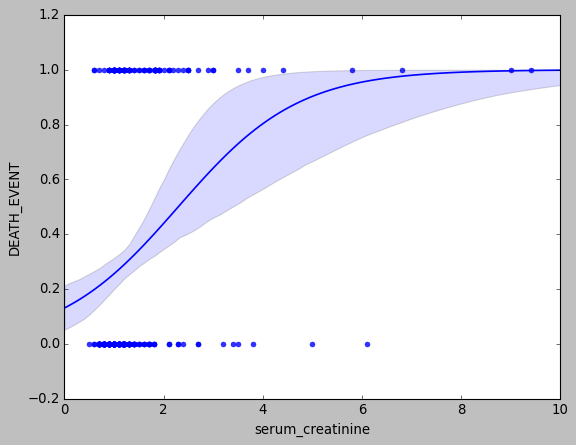

In [25]:
import statsmodels

sns.regplot(x='serum_creatinine', y='DEATH_EVENT', data=df, logistic=True)

<Figure size 640x480 with 0 Axes>

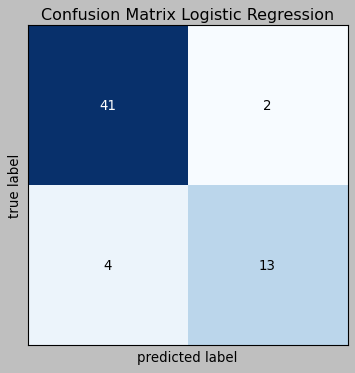

In [26]:
# confusion matrix
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
confMatrix = confusion_matrix(y_test, prediction)
plt.figure()
plot_confusion_matrix(confMatrix, figsize=(7,5),hide_ticks=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix Logistic Regression')
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.87      0.76      0.81        17

    accuracy                           0.90        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.90      0.90      0.90        60



#### With Normalization

In [28]:
# scaling

from sklearn.preprocessing import StandardScaler

#features = df[['age', 'anaemia', 'creatinine_phosphokinase',
#           'diabetes', 'ejection_fraction', 'high_blood_pressure',
#           'platelets', 'serum_creatinine', 'serum_sodium',
#           'sex', 'smoking', 'time']]
features = df[['ejection_fraction', 'serum_creatinine', 'time']]
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [29]:
scaled_data = scaler.transform(features)
print(scaled_data)

[[-1.53055953e+00  4.90056987e-01 -1.62950241e+00]
 [-7.07675018e-03 -2.84552352e-01 -1.60369074e+00]
 [-1.53055953e+00 -9.09000174e-02 -1.59078490e+00]
 [-1.53055953e+00  4.90056987e-01 -1.59078490e+00]
 [-1.53055953e+00  1.26466633e+00 -1.57787906e+00]
 [ 1.62199114e-01  6.83709322e-01 -1.57787906e+00]
 [-1.95374919e+00 -1.87726185e-01 -1.55206738e+00]
 [ 1.85495776e+00 -2.84552352e-01 -1.55206738e+00]
 [ 2.27814742e+00  1.02752318e-01 -1.55206738e+00]
 [-2.60990546e-01  7.75201955e+00 -1.55206738e+00]
 [-7.07675018e-03  2.52340650e+00 -1.55206738e+00]
 [-1.10736987e+00 -4.78204687e-01 -1.55206738e+00]
 [-6.84180207e-01 -2.84552352e-01 -1.53916154e+00]
 [-7.07675018e-03 -2.84552352e-01 -1.53916154e+00]
 [-6.84180207e-01 -3.81378520e-01 -1.52625570e+00]
 [ 1.00857844e+00 -9.09000174e-02 -1.51334987e+00]
 [-7.07675018e-03 -4.78204687e-01 -1.50044403e+00]
 [-2.03838712e+00 -5.75030855e-01 -1.50044403e+00]
 [-1.10736987e+00 -3.81378520e-01 -1.48753819e+00]
 [ 1.43176810e+00  4.90056987e-

In [30]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.2)

In [31]:
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [32]:
model.score(x_test, y_test)

0.8

In [ ]:
# plot logistic regression
sns.regplot(x='serum_creatinine', y='DEATH_EVENT', data=df, logistic=True)

In [ ]:
# confusion matrix

confMatrix = confusion_matrix(y_test, prediction)
plt.figure()
plot_confusion_matrix(confMatrix, figsize=(7,5),hide_ticks=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix Logistic Regression')
plt.show()